In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/home/mohit/virtualenvs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
y_true = (0.5 * x_data) + 5 + noise

In [5]:
x_df = pd.DataFrame(data = x_data, columns = ['X Data'])

In [6]:
y_df = pd.DataFrame(data = y_true, columns = ['Y'])

In [7]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [8]:
y_df.head()

,Y
0,4.038867
1,4.719806
2,5.835931
3,4.701805
4,4.341859


In [9]:
my_data = pd.concat([x_df, y_df], axis = 1)

In [10]:
my_data.head()

,X Data,Y
0,0.00000,4.038867
1,0.00001,4.719806
2,0.00002,5.835931
3,0.00003,4.701805
4,0.00004,4.341859


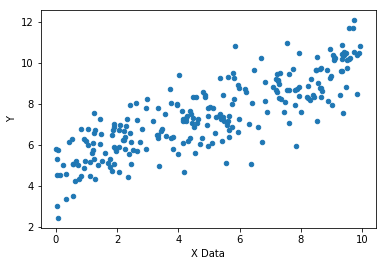

In [11]:
my_data.sample(n = 250).plot(kind = 'scatter', x = 'X Data', y = 'Y')

In [12]:
batch_size = 8

In [13]:
np.random.randn(2)

array([0.03924169, 0.86799216])

In [14]:
m = tf.Variable(-3.36)
b = tf.Variable(-0.45)

In [15]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [16]:
y_model = m * xph + b

In [17]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [19]:
init = tf.global_variables_initializer()

In [20]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_id = np.random.randint(len(x_data), size = batch_size)
        feed = {xph : x_data[rand_id], yph : y_true[rand_id]}
        
        sess.run(train, feed_dict = feed)
        
    model_m, model_b = sess.run([m, b])

In [21]:
model_m

0.49230978

In [22]:
model_b

5.0524216

In [23]:
y_hat = x_data * model_m + model_b

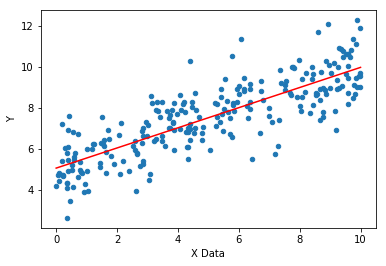

In [24]:
my_data.sample(250).plot(kind = 'scatter', x = 'X Data', y = 'Y')
plt.plot(x_data, y_hat, 'r')